In [60]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [99]:
# Load initial dataset
dataset1 = sio.loadmat('ex6/ex6data1.mat')

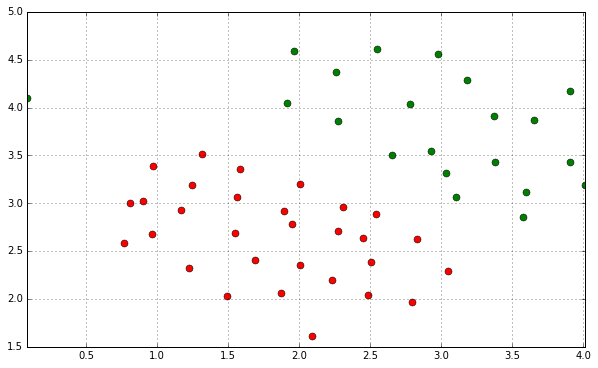

In [198]:
# Extract data
X1 = dataset1['X']
Y1 = dataset1['y']

m = len(Y1)


def plotInitialData(X,Y):
    plt.figure(figsize=(10,6))
    m = len(Y)
    positives = np.array([X[i] for i in range(m) if Y[i] == 1])
    negatives = np.array([X[i] for i in range(m) if Y[i] == 0])
    plt.plot(positives[:,0],positives[:,1],'go',markersize=7)
    plt.plot(negatives[:,0],negatives[:,1],'ro',markersize=7)
    plt.grid(True)
    plt.xlim((min(X[:,0]), max(X[:,0])))


plotInitialData(X1,Y1)
# Observe that dataset can be separated by a linear boundary.
# Notice the outlier positive example on the far left (0.1, 4.1)

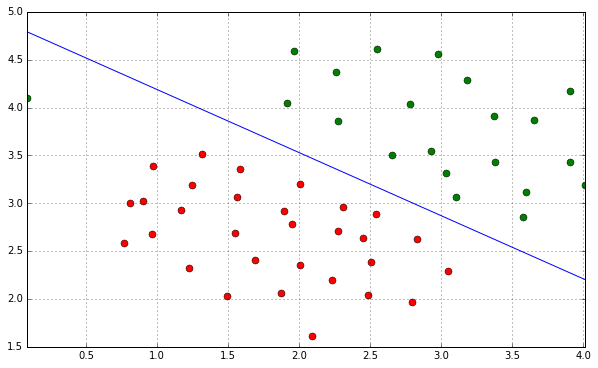

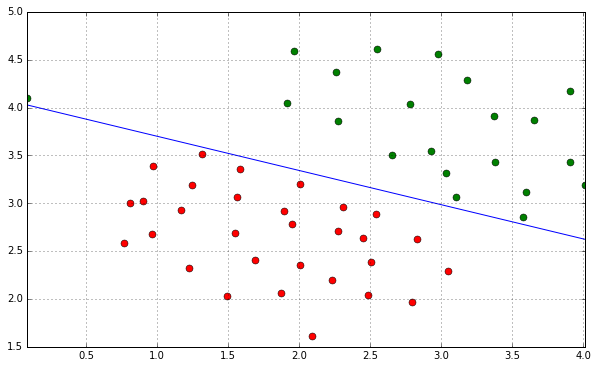

In [199]:
# Try using different values of the C paramter with SVMs.
# The C parameter is a positive value that controls the penalty
# for misclassified training examples.

# I'm going to use scikit-learn's SVM module.
from sklearn import svm
# Try with C = 1
classifierC1 = svm.SVC(C=1, kernel='linear')
classifierC1.fit(X1,Y1.ravel())
# Try with C = 100
classifierC100 = svm.SVC(C=100, kernel='linear')
classifierC100.fit(X1,Y1.ravel())

def plotSVM(X, y, model):
    w = model.coef_
    b = model.intercept_
    xp = np.linspace(min(X[:,0]),max(X[:,0]),100)
    yp = - (w[0][0] * xp + b) / w[0][1]
    plotInitialData(X,y)
    plt.plot(xp,yp,'b-',markersize=10)
    
# When C=1 you should find that the SVM puts the decision boundary in
# the gap between the two datasets and misclassifies the data point
# on the far left.
plotSVM(X1,Y1,classifierC1)
# When C = 100, you should find that the SVM now classifies every single example
# correctly, but has a decision boundary that does not appear to be a natural fit
# for the data.
plotSVM(X1,Y1,classifierC100)

#### SVM with Gaussian Kernel

In [200]:
# Use SVMs with Gaussian kernels on datasets that are not linearly separable

In [201]:
def gaussianKernel(x1,x2,sigma):
    """
    Computes similarity between two points: x1, x2
    sigma - bandwith used to determine how fast the similarity metric decreases
    """
    return np.exp((-np.sum((x1 - x2)**2) / 2 * (sigma**2)))

# Gaussian kernel between x1 = [1, 2, 1] and x2 = [0, 4, -1] and sigma = 0.5
# should be 0.324652
x1 = np.array([1.,2.,1.])
x2 = np.array([0., 4., -1.])
sigma = 0.5

sim = gaussianKernel(x1,x2,sigma)
print sim

0.324652467358


### Example Dataset 2

In [202]:
# Load second dataset and data
dataset2 = sio.loadmat('ex6/ex6data2.mat')
X2, Y2 = dataset2['X'], dataset2['y']
m = len(Y2)

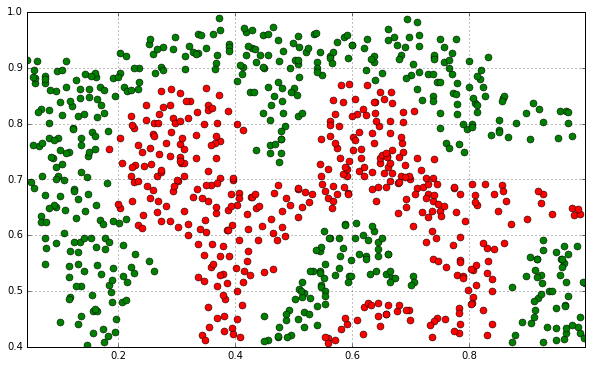

In [203]:
plotInitialData(X2,Y2)

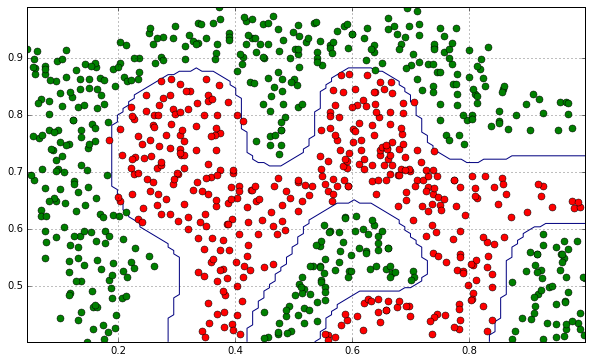

In [218]:
# There is no liniar decision boundary that separates the positive and negative examples 
# for this dataset.
# Using the gaussian kernel with the SVM, we learn a non-linear decision boundary that can
# perform reasonably well on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
classifier = svm.SVC(C=1, gamma=gamma, kernel='rbf')
classifier.fit(X2,Y2.ravel())
def plotNonlinearSVM(X,Y,model):
    # Plot the training data on top of the boundry
    plotInitialData(X,Y)
    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), 100)
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), 100)
    values = np.zeros((len(x1plot),len(x2plot)))
    for i in range(len(x1plot)):
        for j in range(len(x2plot)):
            values[i][j] = float(model.predict(np.array([[x1plot[i], x2plot[j]]])))
    values = values.transpose()
    plt.contour(x1plot, x2plot, values, [0])
    
plotNonlinearSVM(X2,Y2,classifier)

### Example dataset 3

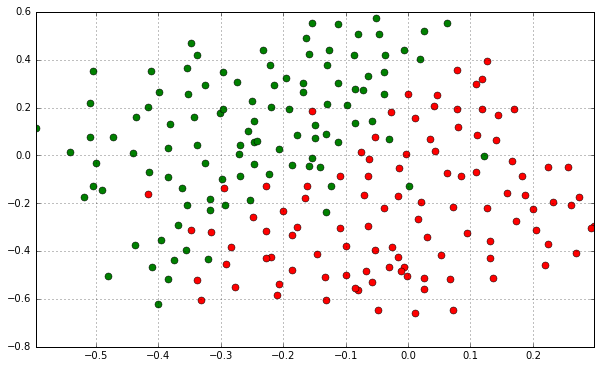

In [225]:
dataset3 = sio.loadmat('ex6/ex6data3.mat')
X3, Y3 = dataset3['X'], dataset3['y']
Xval, Yval = dataset3['Xval'], dataset3['yval']

plotInitialData(X3,Y3)
best_accuracy, best_params = 0, (0, 0)

test_values = [0.1]
for i in range(12):
    test_values.append(test_values[-1] * 3)

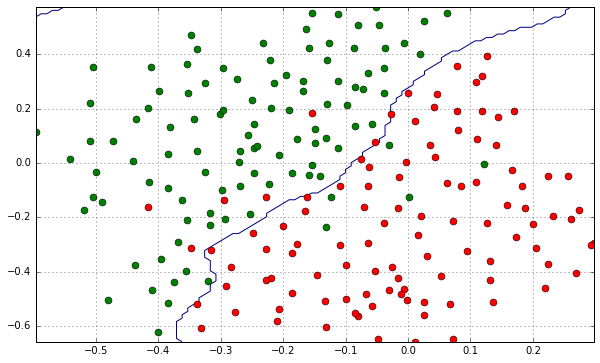

In [227]:
for i in range(len(test_values)):
    for j in range(len(test_values)):
        C = test_values[i]
        sigma = test_values[j]
        classifier = svm.SVC(C=C, gamma=np.power(sigma,-2.))
        classifier.fit(X3,Y3.ravel())
        score = classifier.score(Xval,Yval)
        if score > best_accuracy:
            best_accuracy = score
            best_params = (C, sigma)
        
best_classifier = svm.SVC(C=best_params[0],gamma=np.power(best_params[1],-2.))
best_classifier.fit(X3,Y3.ravel())
plotNonlinearSVM(X3,Y3,best_classifier)